# 1. Imports

In [22]:
import pandas as pd
import numpy as np
import nltk
import re

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import ConfusionMatrixDisplay, precision_score, recall_score, f1_score, accuracy_score, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt


# 2. Data preparation & understanding

### Define the stopwords for english language
We define the Set of stopwords for english, because is the language that texts on the dataframe are using.

In [2]:
nltk.download('punkt')

nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

[nltk_data] Error loading punkt: <urlopen error [SSL:
[nltk_data]     CERTIFICATE_VERIFY_FAILED] certificate verify failed:
[nltk_data]     unable to get local issuer certificate (_ssl.c:1123)>
[nltk_data] Error loading stopwords: <urlopen error [SSL:
[nltk_data]     CERTIFICATE_VERIFY_FAILED] certificate verify failed:
[nltk_data]     unable to get local issuer certificate (_ssl.c:1123)>


### Define the tokenizer function using word_tokenize

In [3]:
def tokenizer(text: str):
    return word_tokenize(text)

### Read data using Pandas

In [4]:
data = pd.read_csv('./DatosSuicidio/SuicidiosProyecto.csv', sep = ',', encoding = 'utf-8')

### Understanding how many rows and columns do we have and how are they labeled

In [5]:
data.shape

(195700, 3)

In [6]:
data.columns

Index(['Unnamed: 0', 'text', 'class'], dtype='object')

### Dropping first column
We decided to drop first column because it does not add any value to the model we want to make

In [7]:
data.drop(labels = ['Unnamed: 0'], axis = 'columns', inplace= True)

### Identifying the classification of the data

In [9]:
data['class'].value_counts(dropna = False, normalize = True)

non-suicide    0.562928
suicide        0.437072
Name: class, dtype: float64

### Selection TfidfVectorizer model
We selected TF-DIF model because of the size of the datase. Rather than using Bag of Words, we prefer TF-DIF by trying to find a fast and low cost solution.

In [10]:
tfidf = TfidfVectorizer(tokenizer = tokenizer, stop_words = stop_words, lowercase = True, strip_accents= 'ascii', max_df = 0.001)

### Separate the data into Train and Test datasets

In [11]:
X_train, X_test, y_train, y_test = train_test_split(data['text'], data['class'], test_size = 0.2, stratify = data['class'], random_state = 1)

### Apply Train dataset to TfdifVectorizer model

In [12]:
X_tfidf = tfidf.fit_transform(X_train)

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/feature_extraction/text.py:404: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ["'d", "'ll", "'re", "'s", "'ve", 'could', 'might', 'must', "n't", 'need', 'sha', 'wo', 'would'] not in stop_words.
  warnings.warn(


### Verifying the length of the vocabulary of the dataset
We got this legth of the vocabulary by using the paramter "max_df" in the TfidfVectorizer class, because it reduces the amount of times a word appears in the dataset by not using it as a token

In [13]:
len(tfidf.vocabulary_)

165787

## KNN Mode

In [14]:
#KNN Model
knn_model = KNeighborsClassifier(n_neighbors = 5)

In [15]:
#Ajuste a los datos de entrenamiento
knn_model.fit(X_tfidf, y_train)

KNeighborsClassifier()

In [17]:
y_test_tfidf_predict = knn_model.predict(tfidf.transform(X_test))

In [18]:
y_train_tfidf_predict = knn_model.predict(X_tfidf)

In [20]:
#Precisión del entrenamiento vs datos de prueba
print('Accuracy (train):', accuracy_score(y_train, y_train_tfidf_predict))
print('Accuracy (test):', accuracy_score(y_test, y_test_tfidf_predict))

Accuracy (train): 0.6116760347470618
Accuracy (test): 0.5733776188042923


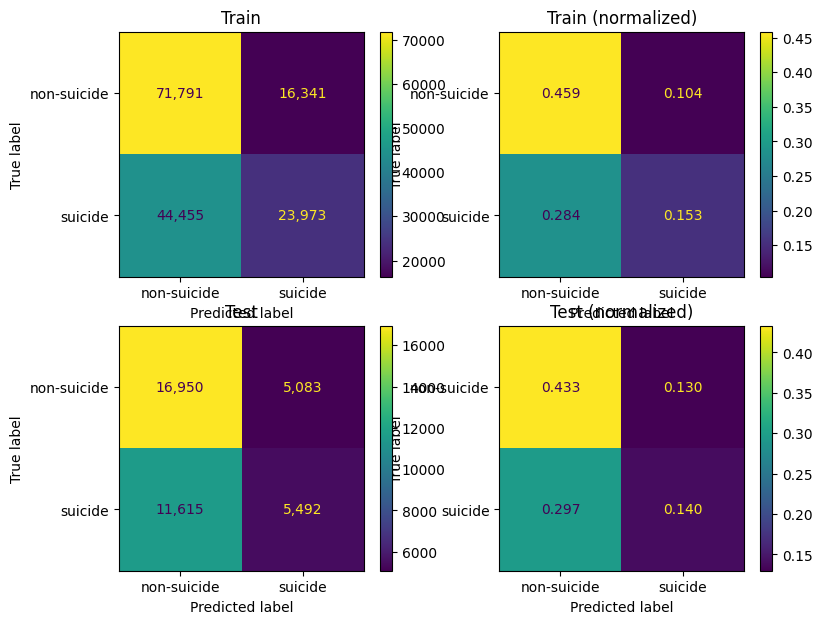

In [25]:
#Impresión de  los heatmaps de las predicciones realizadas
cm_train = confusion_matrix(y_train, y_train_tfidf_predict, labels = knn_model.classes_)
cm_train_norm = confusion_matrix(y_train, y_train_tfidf_predict, labels = knn_model.classes_, normalize = 'all')
cm_test = confusion_matrix(y_test, y_test_tfidf_predict, labels = knn_model.classes_)
cm_test_norm = confusion_matrix(y_test, y_test_tfidf_predict, labels = knn_model.classes_, normalize = 'all')

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize = (9, 7))
ConfusionMatrixDisplay(confusion_matrix = cm_train, display_labels = knn_model.classes_).plot(ax = ax1, values_format = ',.0f')
ConfusionMatrixDisplay(confusion_matrix = cm_train_norm, display_labels = knn_model.classes_).plot(ax = ax2, values_format = '.3f')
ConfusionMatrixDisplay(confusion_matrix = cm_test, display_labels = knn_model.classes_).plot(ax = ax3, values_format = ',.0f')
ConfusionMatrixDisplay(confusion_matrix = cm_test_norm, display_labels = knn_model.classes_).plot(ax = ax4, values_format = '.3f')

ax1.set_title('Train')
ax2.set_title('Train (normalized)')
ax3.set_title('Test')
ax4.set_title('Test (normalized)')
plt.show()